# 1. I/O

Con la funcion `open`
- con `encoding`, podemos especificar el set de caracteres para poder codificar los bytes
- con `errors` podemos especificar la estrategia que se utilizara cuando hayan bytes inconsistentes con el formato

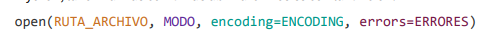

## *Context Manager*

- *keyword* que se asegura de ejecutar `try:` y `finally:`. Util si es posible que al abrir un archivo ocurran excepciones, pero si o si necesitemos cerrar el archivo al final

Para crear un *context manager* debemos implementar los metodos `__enter__` y `__exit__`

- `__enter__`: intrucciones de inicio, por ejemplo, abrir el archivo
- `__exit__`: ejecuta instrucciones que siempre deben ocurrir, haya ocurrido una excepcion o no

In [5]:
import string
import random

class UpperList(list):
    def __enter__(self):
        return self

    def __exit__(self, exc_type, exc_value, traceback):
        for index, char in enumerate(self):
            self[index] = char.upper()

lowercases = string.ascii_lowercase
print(lowercases)

with UpperList() as s_upper:
    for i in range(20):
        s_upper.append(random.choice(lowercases))
    
    print(s_upper)

# terminado del with, se ejecuta __exit__ y las transforma en mayucula
print(s_upper)

abcdefghijklmnopqrstuvwxyz
['h', 'm', 'm', 'g', 'l', 'k', 't', 'e', 't', 'k', 'v', 'f', 'y', 'd', 'g', 'y', 'd', 'p', 'r', 'k']
['H', 'M', 'M', 'G', 'L', 'K', 'T', 'E', 'T', 'K', 'V', 'F', 'Y', 'D', 'G', 'Y', 'D', 'P', 'R', 'K']


## Emulacion archivos para I/O

`io`: libreria con las clases `StringIO` y `BytesIO`. Utiles para evitar tener que escribir datos en un archivo real, podemos simular tener un archivo. Tratan cadenas de caracteres/bytes como si fueran objetos tipo archivo en la memoria

In [10]:
from io import StringIO, BytesIO

# simulacion de un archivo con string
file_in = StringIO('Líneas de texto')

# simulacion de un archivo de bytes
file_out = BytesIO()

char = file_in.read(1)
while char:
    # codificamos el caracter en ascii y lo escribimos en el archivo de bytes
    file_out.write(char.encode('ascii', 'ignore'))
    
    # leemos el siguente caracter
    char = file_in.read(1)

buffer = file_out.getvalue()
print(buffer)

b'Lneas de texto'


# 2. Strings

- secuencias inmutables

In [12]:
# concatenaciones utiles

a = "programando"
b = 'mucho'
c = '''un string
con múltiples
lineas'''
d = """Multiples con
     comillas dobles"""
e = ("Tres" " strings" " juntos")
f = "un string " + "concatenado"
g = ("Otra forma de string que nos permite "
     "utilizar más de una línea pero en verdad solo es una,"
     " lo que es muy útil para cumplir PEP-8 :)")

print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)

programando
mucho
un string
con múltiples
lineas
Multiples con
     comillas dobles
Tres strings juntos
un string concatenado
Otra forma de string que nos permite utilizar más de una línea pero en verdad solo es una, lo que es muy útil para cumplir PEP-8 :)


### Secuencias de escape

Combinacion *backslash* `\` con otros caracteres para dar nuevos significados

Secuencia | Significado 
--- | --- 
\\" | Comilla doble
\\' | Comilla simple
\n | Salto de línea
\t | Tabulador
\\\ | Barra inversa o *Backslash*

### Metodos utiles

In [14]:
print(dir(str))

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'removeprefix', 'removesuffix', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


- Existen metodos que responden preguntas acerca del string
- Y metodos que actuan directamente sobre el, **retornando uno nuevo**, ya que el original es inmutable

## *f-strings*. Uso de variables dentro de un string

In [17]:
# para escribirlos en mas lieneas
from_email = "cruz@ing.puc.cl"
to_email = "alumnos@iic2233.com"
message = ("\nEste es un mail de prueba.\n"
           "\nEspero que el mensaje te sea de mucha utilidad!")
subject = "IIC2233 - Este correo es urgente"


print(f"""
From: <{from_email}>
To: <{to_email}>
Subject: {subject}
{message}
""")


From: <cruz@ing.puc.cl>
To: <alumnos@iic2233.com>
Subject: IIC2233 - Este correo es urgente

Este es un mail de prueba.

Espero que el mensaje te sea de mucha utilidad!



## Impresion Strings

Podemos modificar como esta siendo imprimida la variable dentro del *f-string*. Veamos un ejemplo

In [18]:
# lista de compras
compra = [('leche', 2, 120), ('pan', 3.5, 800), ('arroz', 1.75, 960)]

In [19]:
# creamos una tabla para poder visualizarlos
print('PRODUCTO | CANTIDAD | PRECIO | SUBTOTAL')
for producto, precio, cantidad in compra:
    subtotal = precio * cantidad
    print(f'{producto} | {cantidad} | ${precio} | ${subtotal}')

PRODUCTO | CANTIDAD | PRECIO | SUBTOTAL
leche | 120 | $2 | $240
pan | 800 | $3.5 | $2800.0
arroz | 960 | $1.75 | $1680.0


¿Como podemos alinear la tabla?

- `:ns`. Dato `string` de `n` caracteres, si el caracter es menor que los `n` caracteres, el resto se rellena con espacios. Si es mayor que `n`, el string no se trunca, para truncar en caso de pasarse del maximo, añadimos un punto y el largo maximo del string

    - `:n.ks`: string de largo `n`, si es menor, rellena con espacios y si supera `k`, trunca

In [24]:
# creamos una tabla para poder visualizarlos
print('PRODUCTO | CANTIDAD | PRECIO | SUBTOTAL')
for producto, precio, cantidad in compra:
    subtotal = precio * cantidad
    print(f'{producto:8s} | {cantidad} | ${precio} | ${subtotal}')
# lo igualamos a 8, el largo de la primera columna

PRODUCTO | CANTIDAD | PRECIO | SUBTOTAL
leche    | 120 | $2 | $240
pan      | 800 | $3.5 | $2800.0
arroz    | 960 | $1.75 | $1680.0


In [26]:
compra = [('leche', 2, 120), ('paaaaaaaaaaaaaaaaaaan', 3.5, 800), ('arroz', 1.75, 960)]
# creamos una tabla para poder visualizarlos
print('PRODUCTO | CANTIDAD | PRECIO | SUBTOTAL')
for producto, precio, cantidad in compra:
    subtotal = precio * cantidad
    print(f'{producto:8s} | {cantidad} | ${precio} | ${subtotal}')
# lo igualamos a 8, el largo de la primera columna

PRODUCTO | CANTIDAD | PRECIO | SUBTOTAL
leche    | 120 | $2 | $240
paaaaaaaaaaaaaaaaaaan | 800 | $3.5 | $2800.0
arroz    | 960 | $1.75 | $1680.0


In [29]:
compra = [('leche', 2, 120), ('paaaaaaaaaaaaaaaaaaan', 3.5, 800), ('arroz', 1.75, 960)]
# creamos una tabla para poder visualizarlos
print('PRODUCTO | CANTIDAD | PRECIO | SUBTOTAL')
for producto, precio, cantidad in compra:
    subtotal = precio * cantidad
    print(f'{producto:8.8s} | {cantidad} | ${precio} | ${subtotal}')

# añadimos un largo maximo para truncar

PRODUCTO | CANTIDAD | PRECIO | SUBTOTAL
leche    | 120 | $2 | $240
paaaaaaa | 800 | $3.5 | $2800.0
arroz    | 960 | $1.75 | $1680.0


- `:[]^nd`: entero decimal de hasta `n` digitos, `^` indica que debe quedar centrado dentro del espacio disponible, lo que esta dentro de `[]` es rellenado a ambos lados

- Para especificar, se sigue el siguetne orden de izq a der
1. caracter para llenar los espacios vacios
2. Despues el alineamiento
3. Tamaño
4. Tipo

In [32]:
compra = [('leche', 2, 120), ('paaaaaaaaaaaaaaaaaaan', 3.5, 800), ('arroz', 1.75, 960)]
# creamos una tabla para poder visualizarlos
print('PRODUCTO | CANTIDAD | PRECIO | SUBTOTAL')
for producto, precio, cantidad in compra:
    subtotal = precio * cantidad
    print(f'{producto:8.8s} | {cantidad:+^8d} | ${precio} | ${subtotal}')

# rellenamos con + a ambos lados para q queden centrado

PRODUCTO | CANTIDAD | PRECIO | SUBTOTAL
leche    | ++120+++ | $2 | $240
paaaaaaa | ++800+++ | $3.5 | $2800.0
arroz    | ++960+++ | $1.75 | $1680.0


In [37]:
compra = [('leche', 2, 120), ('paaaaaaaaaaaaaaaaaaan', 3.5, 800), ('arroz', 1.75, 960)]
# creamos una tabla para poder visualizarlos
print('PRODUCTO | CANTIDAD | PRECIO | SUBTOTAL')
for producto, precio, cantidad in compra:
    subtotal = precio * cantidad
    print(f'{producto:8.8s} | {cantidad: ^8d} | ${precio} | ${subtotal}')

    # rellenamos con espacios, como el largo es 8, no queda perfectamente centrado


PRODUCTO | CANTIDAD | PRECIO | SUBTOTAL
leche    |   120    | $2 | $240
paaaaaaa |   800    | $3.5 | $2800.0
arroz    |   960    | $1.75 | $1680.0


- `[]<n.kf`:
    - todos los lugares libres se llenan con lo que este en `[]`
    - `<` indica que el alineamiento es a la izquierda
    - el formato `f` indica que es un *float* de `n` enteros y `k` decimales



- `[]>n.kf`:
    - todos los lugares libres se llenan con lo que este en `[]`
    - `>` indica que el alineamiento es a la derecha
    - el formato `f` indica que es un *float* de `n` enteros y `k` decimales

In [48]:
compra = [('leche', 2, 120), ('paaaaaaaaaaaaaaaaaaan', 3.5, 800), ('arroz', 1.75, 960)]
# creamos una tabla para poder visualizarlos
print('PRODUCTO | CANTIDAD | PRECIO | SUBTOTAL')
for producto, precio, cantidad in compra:
    subtotal = precio * cantidad
    print(f'{producto:8.8s} | {cantidad: ^8d} | ${precio: <5.2f} | ${subtotal: >7.2f}')

# precio de largo 5 enteros y 2 decimales
# subtotal de largo total 7 enteros y 2 decimales

PRODUCTO | CANTIDAD | PRECIO | SUBTOTAL
leche    |   120    | $2.00  | $ 240.00
paaaaaaa |   800    | $3.50  | $2800.00
arroz    |   960    | $1.75  | $1680.00


In [49]:
compra = [('leche', 2, 120), ('paaaaaaaaaaaaaaaaaaan', 3.5, 800), ('arroz', 1.75, 960)]
# creamos una tabla para poder visualizarlos
print('PRODUCTO | CANTIDAD | PRECIO | SUBTOTAL')
for producto, precio, cantidad in compra:
    subtotal = precio * cantidad
    print(f'{producto:8.8s} | {cantidad: ^8d} | ${precio: >5.2f} | ${subtotal: <7.2f}')

PRODUCTO | CANTIDAD | PRECIO | SUBTOTAL
leche    |   120    | $ 2.00 | $240.00 
paaaaaaa |   800    | $ 3.50 | $2800.00
arroz    |   960    | $ 1.75 | $1680.00


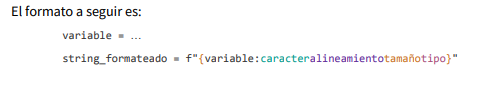

# 3. *Regular Expressions* - *Regex*

In [1]:
import re

#### Numero que empieze con 8, o con 9, y con un total de 10 digitos

- Empieze con 8 o 9: `[89]`
- El siguente numero (el tercero) puede ser cualquiera `[0-9]`
- Los siguentes numeros deben cumplir lo mismo para un total de 9, es decir, queremos repetir 9 veces el bracket anterior: `{9}`

In [10]:
reg = '[89][0-9]{9}'

seq = [
    "8445165",
    "8231464574",
    "9741246668",
    "5155564556",
    "9451"
]

for s in seq:
    print(f'{s}: -> {re.match(reg, s)}')

8445165: -> None
8231464574: -> <re.Match object; span=(0, 10), match='8231464574'>
9741246668: -> <re.Match object; span=(0, 10), match='9741246668'>
5155564556: -> None
9451: -> None


#### Email ID

- Cualquier tipo de caracter antes de la @ **uno o mas veces**: `[a-zA-Z0-9._]+`
- luego viene `@`
- Pertencer a los dominio gmail o uc, y si es uc, podria aparecer un mat. antes de este
- se crea un grupo logico OR, donde un lado es gmail (`(gmail|`) y el otro lado, es el grupo mat., que podria o no aparecer, y luego uc `(mat\.)?uc)`
- Juntamos esa expresion `(gmail|(mat\.)?uc)`

- luego va un punto literal `\.`

- Luego deberia terminar o con *com* o *cl*: `(com|cl)`

In [11]:
reg = "[a-zA-Z0-9_.]+@(gmail|(mat\.)?uc)\.(com|cl)"

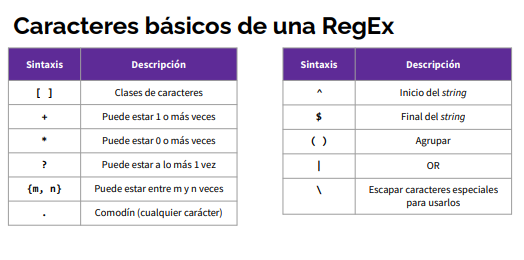

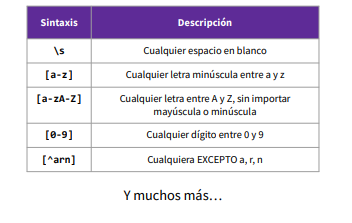

## Modulo `re`

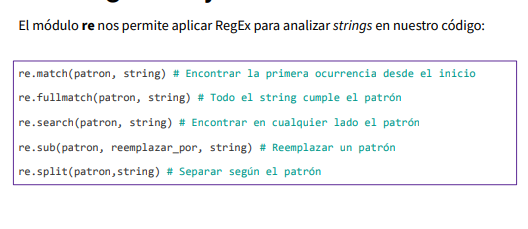